# Mini-Project #2 (Clustering)

Student Name: **Subhadyuti Sahoo**
<br>
Course: **Adv Topics in Machine Learning**

### Importing Necessary Libraries, Modules and Classes

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import statistics
import sklearn
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

### Importing the Dataset

In [2]:
dataFrame = pd.read_csv('p1dataset2021.csv', header = None)  # Forming the pandas 
                                                             # dataframe
display(dataFrame.head(5))  # Displaying the first 5 rows of pandas dataFrame

,0,1,2,3,4,5,6,7,8,9,...,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103
0,HG01879,1,ACB,G,G,T,T,A,A,C,...,T,A,T,A,A,T,T,T,G,A
1,HG01880,2,ACB,A,A,T,T,A,G,C,...,G,C,T,G,A,T,C,T,G,G
2,HG01881,2,ACB,A,A,T,T,A,A,G,...,G,C,T,G,A,T,C,T,G,G
3,HG01882,1,ACB,A,A,T,C,A,A,G,...,G,A,T,G,A,T,C,T,G,G
4,HG01883,2,ACB,G,A,T,C,G,A,C,...,G,C,T,G,A,T,C,T,G,G


### Checking for Missing Values (if any)

In [3]:
# Checking if there are missing values in dataFrame
result = (dataFrame.isna().values.any()) or (dataFrame.isnull().values.any())
if (result == True):
    n_missing_values = dataFrame.isna().sum().sum() + dataFrame.isnull().sum().sum()

# Displaying if there are any missing values in dataFrame
print('--- Checking for Missing Values ---')
print('Q. Are there any missing values in the dataset?')   
if (result == True):
    print('A. Yes')
    print('Q. How many?')
    print('A. ', n_missing_values)
else:
    print('A. No') 
print('-----------------------------------')
print('\n')

--- Checking for Missing Values ---
Q. Are there any missing values in the dataset?
A. No
-----------------------------------




<a id='Student Task'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b> Convert Data into Binary Matrix

To start this project, first convert the data of nucleobases to a real-valued matrix (PCA needs a real-valued matrix). In the class specifically, convert the genetic data into a $\textit{binary}$ matrix $\textbf{X}$ such that $\mathbf{X}_{i,j}$ = 0 if the $i^{\rm th}$ individual has column $j$’s mode nucleobase for his or her $j^{\rm th}$ nucleobase, and $\mathbf{X}_{i,j}$ = 1 otherwise. Note that all mutations appear as a 1, even if they are different mutations, so if the mode for column $j$ is “`G`", then if individual $i$ has an "`A`", "`T`", or "`C`", then $\mathbf{X}_{i,j}$ would still be 1.    
    
</div>

### Forming the working dataset

In [4]:
# Forming the working dataset dSet by ignoring the first 3 columns
dFrame = dataFrame.drop(columns=[0, 1, 2])  # dropping the 1st 3 columns
dSet = dFrame.to_numpy()  # getting the numpy dSet
m, n = dSet.shape   # Getting the no. of rows and columns of the dataset dSet

# Getting the vectors for genders and populations for using in plots later
genders = dataFrame.iloc[:, 1].to_numpy()
populations = dataFrame.iloc[:, 2].to_numpy()

### Forming the vector of mode nucleobases from each column

In [5]:
modej_list = []  # Creating an empty list for storing 
for j in range(n):  # Starting a for-loop to get the mode of nucelobase from each column
    dSetj = dSet[:, j]  # Assigning a column vector to a temporary variable dSetj
    modeval = statistics.mode(dSetj)  # Finding out the mode nucloebase of the jth column
    modej_list.append(modeval)  # Appending the mode nucleobase of the jth column to
                                # the empty list modej_list
    
modej = np.asarray(modej_list)  # Converting the list to a vector
modej = modej.reshape(1,n)   # Converting modej vector into a row vector

### Forming the binary matrix X

In [6]:
X = np.ones((m,n))  # Forming a matrix X with all the entries as 1
for i in range(m):  # Running a for-loop to run through all the rows of dSet
    for j in range(n):  # Running a for-loop to run through all the columns of dSet
        if dSet[i, j] == modej[0, j]:   # If condition is true, 
            X[i, j] = 0                 # then X[i, j] is changed to 0
        elif (modej[0, j] == 'G') and (dSet[i, j] == 'A' or dSet[i, j] == 'T' or dSet[i, j] == 'C'):
            X[i, j] = 1  # If above condition true, then X[i, j] remains equal to 1           

### Standardizing matrix X

In [7]:
scaler = StandardScaler()   # Forming an instance of StandardScaler() class
Xscaled = scaler.fit_transform(X)   # Scaling matrix X in order to have zero mean
                                    # and unit standard deviation

<a id='QuestionA'></a>
<div class=" alert alert-warning">
    <b>Question.</b>
 
As the data is in a high-dimensional space, let’s start with the clustering based on the
projection on the first two principal components $ v_{1} $ and $ v_{2} $. Look at your plot in Part (b) of mini-project $\texttt{1}$. If you are to manually form clusters, how many would you form? Note that you should not use any color/population information in that plot when forming clusters, i.e., you should only separate points based on distance/density. You can see that some populations are genetically close to each other and belong to the same cluster. [Answer in one sentence.]

</div>

<a id='AnswerQA'></a>
<div class=" alert alert-info">
    <b>Answer.</b>

Based on distance/density, I would form $\underline{\textbf{3}}$ clusters.
    
</div>

### Calculating the principal components of X

In [8]:
pca = PCA(n_components=4)  # Calculating 4 principal components all at once
Xprojected = pca.fit_transform(Xscaled)   # Estimating the projected matrix for Xscaled

### Forming the Dataset for Running Clustering Algorithms

#### Dataset Consists of First Two Projections

In [9]:
Xcluster = Xprojected[:, 0:2]

#### Scatter Plot of the Dataset

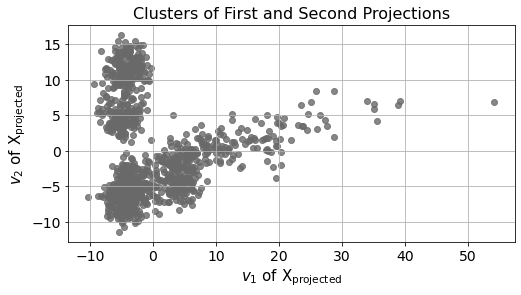

In [10]:
# Scatter plot (if any) for Question(a)
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(Xcluster[:,0], Xcluster[:,1], c = 'dimgray', alpha=0.8)
ax.set_title('Clusters of First and Second Projections', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{2}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.grid()
plt.show()

<a id='Student Task'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b>
 
Now run K-means++ clustering on the first two principal components of the $\texttt{995}$ samples with K equal to what you observed in the sections above. Try to run it multiple times with different initialization while keeping all the remaining settings the same.   

</div>

### Running KMeans++ Clustering Algorithm on the First Two Principal Projections

#### KMeans++ Clustering With Different Initializations

In [11]:
n_clusters_observed = 3
y_kmeansPP = np.zeros((1,Xcluster.shape[0]))

for i in range(9):
    kmeansPP = KMeans(n_clusters = n_clusters_observed, 
                      init = 'k-means++',
                      random_state = i) 
    y_kmeansPP = np.vstack((y_kmeansPP, kmeansPP.fit_predict(Xcluster)))
    
y_kmeansPP = np.delete(arr = y_kmeansPP,
                       obj = 0, 
                       axis = 0)

#### Scatter Plots of KMeans++ Clustering With Different Initializations

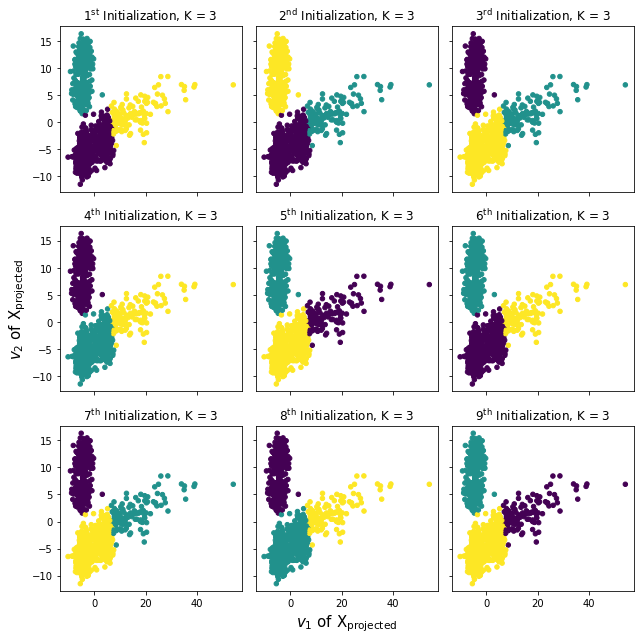

In [12]:
fig, ax = plt.subplots(nrows=3, ncols=3, 
                       sharex=True, sharey=True, 
                       figsize=(9,9))
ax[0,0].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_kmeansPP[0, :])
ax[0,0].set_title('1$^{\mathrm{st}}$ Initialization, K = 3')
ax[0,1].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_kmeansPP[1, :])
ax[0,1].set_title('2$^{\mathrm{nd}}$ Initialization, K = 3')
ax[0,2].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_kmeansPP[2, :])
ax[0,2].set_title('3$^{\mathrm{rd}}$ Initialization, K = 3')
ax[1,0].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_kmeansPP[3, :])
ax[1,0].set_title('4$^{\mathrm{th}}$ Initialization, K = 3')
ax[1,0].set_ylabel('$v_{2}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax[1,1].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_kmeansPP[4, :])
ax[1,1].set_title('5$^{\mathrm{th}}$ Initialization, K = 3')
ax[1,2].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_kmeansPP[5, :])
ax[1,2].set_title('6$^{\mathrm{th}}$ Initialization, K = 3')
ax[2,0].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_kmeansPP[6, :])
ax[2,0].set_title('7$^{\mathrm{th}}$ Initialization, K = 3')
ax[2,1].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_kmeansPP[7, :])
ax[2,1].set_title('8$^{\mathrm{th}}$ Initialization, K = 3')
ax[2,1].set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax[2,2].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_kmeansPP[8, :])
ax[2,2].set_title('9$^{\mathrm{th}}$ Initialization, K = 3')
fig.tight_layout()
plt.show()

<a id='QuestionB'></a>
<div class=" alert alert-warning">
    <b>Question.</b>
 
What can you observe? Plot the best clustering results using color-coded scatter plot (one color for each cluster). 

</div>

#### Best KMeans++ Clustering $\rightarrow$ $\texttt{6}^{\rm th}$ Initialization

In [13]:
best_init = 5
kmeansPP = KMeans(n_clusters = n_clusters_observed, 
                  init = 'k-means++',
                  random_state = best_init)
y_kmeansPP = kmeansPP.fit_predict(Xcluster)
centroids = kmeansPP.cluster_centers_
print('--- Printing the Centroids ---')
print('The centroids are:')
print(centroids)
print('------------------------------')
print('\n')

--- Printing the Centroids ---
The centroids are:
[[-1.199 -5.053]
 [-4.422 8.777]
 [15.723 1.594]]
------------------------------




<a id='AnswerQA'></a>
<div class=" alert alert-info">
    <b>Answer.</b>

$\textbf{Observation}$: The run with centroids at ($\texttt{-1.199}$, $\texttt{-5.053}$), ($\texttt{-4.422}$, $\texttt{8.779}$) and ($\texttt{15.724}$, $\texttt{1.589}$) is the best one in my case.
    
</div>

#### Scatter Plot of The Best KMeans++ Clustering Before The Elbow Method

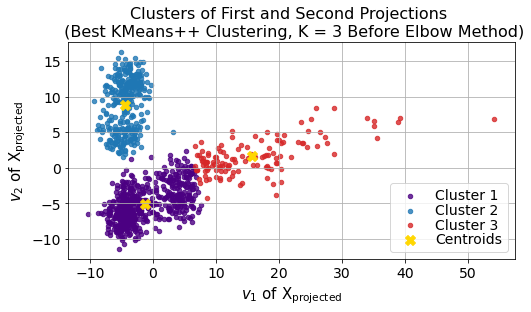

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(Xcluster[y_kmeansPP == 0, 0], Xcluster[y_kmeansPP == 0, 1], 
           s = 20, c = 'indigo', label = 'Cluster 1', alpha=0.8)
ax.scatter(Xcluster[y_kmeansPP == 1, 0], Xcluster[y_kmeansPP == 1, 1], 
           s = 20, c = 'tab:blue', label = 'Cluster 2', alpha=0.8)
ax.scatter(Xcluster[y_kmeansPP == 2, 0], Xcluster[y_kmeansPP == 2, 1], 
           s = 20, c = 'tab:red', label = 'Cluster 3', alpha=0.8)
ax.scatter(kmeansPP.cluster_centers_[:, 0], kmeansPP.cluster_centers_[:, 1], 
           s = 100, c = 'gold', marker='X', label = 'Centroids', alpha=1.0)
ax.set_title('Clusters of First and Second Projections \n (Best KMeans++ Clustering, K = 3 Before Elbow Method)', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{2}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(prop={'size': 14}, ncol=1, labelspacing=0.05, loc='lower right')
plt.grid()
plt.show()

<a id='Student Task'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b>
 
Now do the elbow curve for a range of K values. 

</div>

### The Elbow Method

#### Estimating the Optimal Number of Clusters

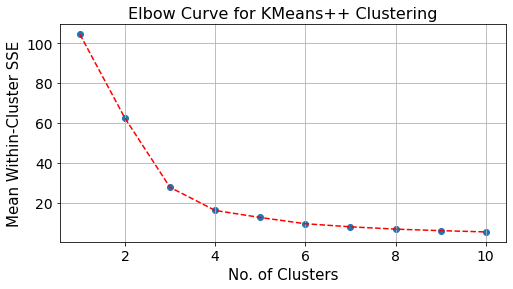

In [15]:
meanWCSSE = []   # Creating an empty vector for storing the values of wcss
data_num = Xcluster.shape[0]

# Calculating Mean Within Cluster SSE for different clusters from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++', 
                    random_state = best_init
                   )
    kmeans.fit(Xcluster)
    meanWCSSE.append((1/data_num) * kmeans.inertia_)
    
# Plotting Number_of_clusters vs WCSS
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(range(1, 11), meanWCSSE, 'r--')
ax.scatter(range(1, 11), meanWCSSE)
ax.set_title('Elbow Curve for KMeans++ Clustering', 
             fontsize=16)
ax.set_xlabel('No. of Clusters', fontsize=15)
ax.set_ylabel('Mean Within-Cluster SSE', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.grid()
plt.show()

<a id='QuestionC'></a>
<div class=" alert alert-warning">
    <b>Question.</b>

From the curve, can you say whether your previous choice of K was reasonable? If yes, briefly explain why. If not, plot the color-coded scatter plot of the clustering results using a reasonable K value. 
    
</div>

<a id='AnswerQA'></a>
<div class=" alert alert-info">
    <b>Answer.</b>

$\textbf{Short Discussion}$: My choice of K was <u>NOT</u> reasonable. The optimal K is $\texttt{4}$. This is because the mean within-cluster SSE stops decreasing drastically once K is equal to $\texttt{4}$. 
    
</div>

#### Best KMeans++ Clustering After Performing The Elbow Method

In [16]:
n_clusters_optimal = 4
kmeansPP = KMeans(n_clusters = n_clusters_optimal, 
                  init = 'k-means++',
                  random_state = best_init)
y_kmeansPP = kmeansPP.fit_predict(Xcluster)

#### Scatter Plot of The Best KMeans++ Clustering After Performing The Elbow Method

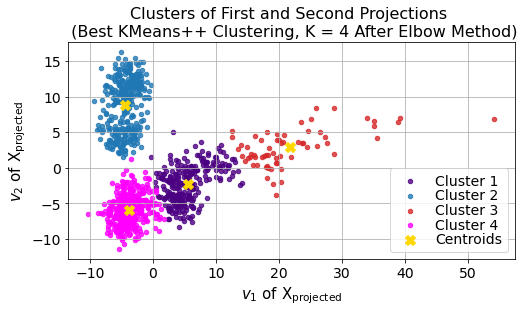

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(Xcluster[y_kmeansPP == 0, 0], Xcluster[y_kmeansPP == 0, 1], 
           s = 20, c = 'indigo', label = 'Cluster 1', alpha=0.8)
ax.scatter(Xcluster[y_kmeansPP == 1, 0], Xcluster[y_kmeansPP == 1, 1], 
           s = 20, c = 'tab:blue', label = 'Cluster 2', alpha=0.8)
ax.scatter(Xcluster[y_kmeansPP == 2, 0], Xcluster[y_kmeansPP == 2, 1], 
           s = 20, c = 'tab:red', label = 'Cluster 3', alpha=0.8)
ax.scatter(Xcluster[y_kmeansPP == 3, 0], Xcluster[y_kmeansPP == 3, 1], 
           s = 20, c = 'magenta', label = 'Cluster 4', alpha=0.8)
ax.scatter(kmeansPP.cluster_centers_[:, 0], kmeansPP.cluster_centers_[:, 1], 
           s = 100, c = 'gold', marker='X', label = 'Centroids', alpha=1.0)
ax.set_title('Clusters of First and Second Projections \n (Best KMeans++ Clustering, K = 4 After Elbow Method)', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{2}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(prop={'size': 14}, ncol=1, labelspacing=0.05, loc='lower right')
plt.grid()
plt.show()

<a id='Student Task'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b>
 
Now run DBSCAN clustering on the first two principal components. Try to use different values of the two metrics, epsilon and minPts, while keeping all the remaining settings the same. 
    
</div>

### Running DBSCAN Clustering Algorithm on the Dataset

#### DBSCAN Clustering Where Epsilon is Varying, MinPts is Static

In [18]:
minPts = 4
y_dbScan = np.zeros((1,Xcluster.shape[0]))

for i in np.arange(1.46, 1.54, 0.01):
    dbScan = DBSCAN(eps=i, min_samples=minPts).fit(Xcluster)
    y_dbScan = np.vstack((y_dbScan, dbScan.fit_predict(Xcluster)))
    
y_dbScan = np.delete(arr = y_dbScan,
                     obj = 0, 
                     axis = 0)

#### Scatter Plots of DBSCAN Clustering With Varying Epsilon and Static MinPts

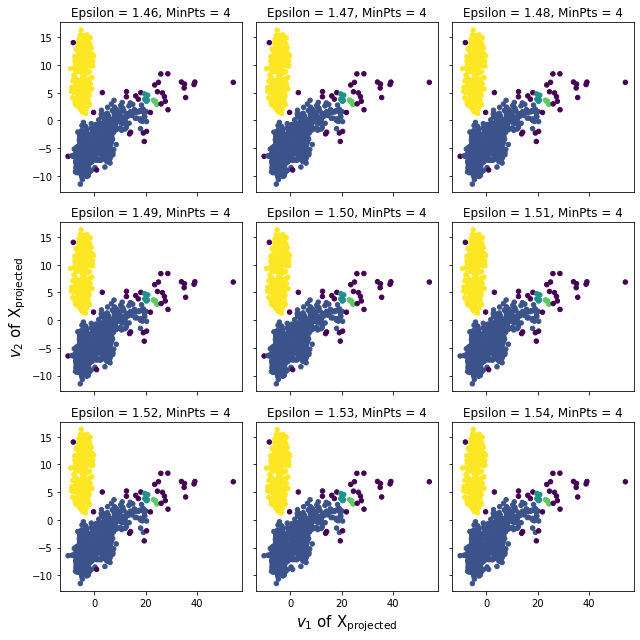

In [19]:
fig, ax = plt.subplots(nrows=3, ncols=3, 
                       sharex=True, sharey=True, 
                       figsize=(9,9))
ax[0,0].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[0, :])
ax[0,0].set_title('Epsilon = 1.46, MinPts = 4')
ax[0,1].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[1, :])
ax[0,1].set_title('Epsilon = 1.47, MinPts = 4')
ax[0,2].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[2, :])
ax[0,2].set_title('Epsilon = 1.48, MinPts = 4')
ax[1,0].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[3, :])
ax[1,0].set_title('Epsilon = 1.49, MinPts = 4')
ax[1,0].set_ylabel('$v_{2}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax[1,1].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[4, :])
ax[1,1].set_title('Epsilon = 1.50, MinPts = 4')
ax[1,2].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[5, :])
ax[1,2].set_title('Epsilon = 1.51, MinPts = 4')
ax[2,0].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[6, :])
ax[2,0].set_title('Epsilon = 1.52, MinPts = 4')
ax[2,1].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[7, :])
ax[2,1].set_title('Epsilon = 1.53, MinPts = 4')
ax[2,1].set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax[2,2].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[8, :])
ax[2,2].set_title('Epsilon = 1.54, MinPts = 4')
fig.tight_layout()
plt.show()

#### DBSCAN Clustering Where Epsilon is Static, MinPts is Varying

In [20]:
eps_optimal = 1.50
y_dbScan = np.zeros((1,Xcluster.shape[0]))

for i in range(1, 10, 1):
    dbScan = DBSCAN(eps=eps_optimal, min_samples=i).fit(Xcluster)
    y_dbScan = np.vstack((y_dbScan, dbScan.fit_predict(Xcluster)))
    
y_dbScan = np.delete(arr = y_dbScan,
                     obj = 0, 
                     axis = 0)

#### Scatter Plots of DBSCAN Clustering With Static Epsilon and Varying MinPts

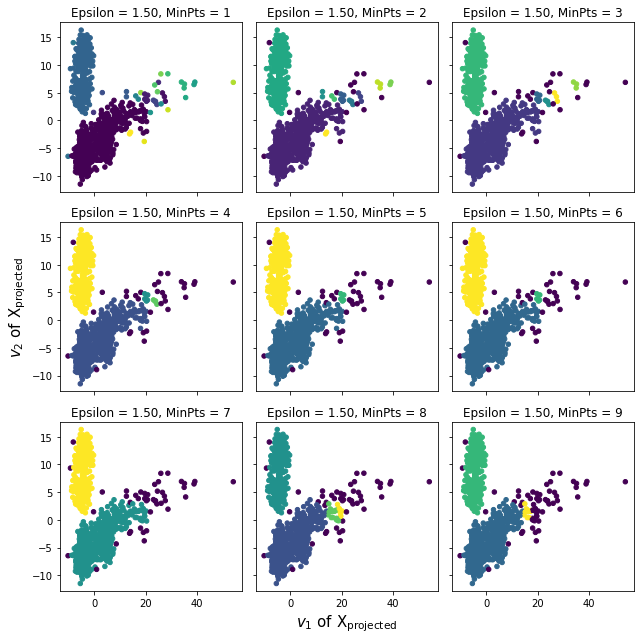

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=3, 
                       sharex=True, sharey=True, 
                       figsize=(9,9))
ax[0,0].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[0, :])
ax[0,0].set_title('Epsilon = 1.50, MinPts = 1')
ax[0,1].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[1, :])
ax[0,1].set_title('Epsilon = 1.50, MinPts = 2')
ax[0,2].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[2, :])
ax[0,2].set_title('Epsilon = 1.50, MinPts = 3')
ax[1,0].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[3, :])
ax[1,0].set_title('Epsilon = 1.50, MinPts = 4')
ax[1,0].set_ylabel('$v_{2}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax[1,1].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[4, :])
ax[1,1].set_title('Epsilon = 1.50, MinPts = 5')
ax[1,2].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[5, :])
ax[1,2].set_title('Epsilon = 1.50, MinPts = 6')
ax[2,0].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[6, :])
ax[2,0].set_title('Epsilon = 1.50, MinPts = 7')
ax[2,1].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[7, :])
ax[2,1].set_title('Epsilon = 1.50, MinPts = 8')
ax[2,1].set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax[2,2].scatter(Xcluster[:, 0], Xcluster[:, 1], s=20, c=y_dbScan[8, :])
ax[2,2].set_title('Epsilon = 1.50, MinPts = 9')
fig.tight_layout()
plt.show()

<a id='QuestionD'></a>
<div class=" alert alert-warning">
    <b>Question.</b>
 
What can you observe? Plot the best clustering results using color-coded scatter plot (one color for each cluster). 
    
</div>

<a id='AnswerQA'></a>
<div class=" alert alert-info">
    <b>Answer.</b>

$\textbf{Observation}$: The run with Epsilon = $\texttt{1.50}$ and MinPts = $\texttt{4}$ is the best run in my case. 
    
</div>

#### Best DBSCAN Clustering $\rightarrow$ Epsilon = 1.50, MinPts = 4

In [22]:
eps_optimal = 1.50
minPts_optimal = 4
dbScan = DBSCAN(eps=eps_optimal, min_samples=minPts_optimal).fit(Xcluster)
y_dbScan = dbScan.fit_predict(Xcluster)

#### Scatter Plot of The Best DBSCAN Clustering

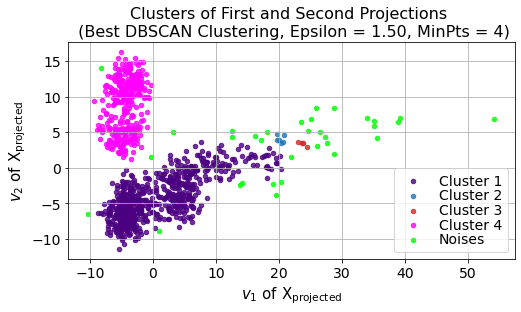

In [23]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(Xcluster[y_dbScan == 0, 0], Xcluster[y_dbScan == 0, 1], 
           s = 20, c = 'indigo', label = 'Cluster 1', alpha=0.8)
ax.scatter(Xcluster[y_dbScan == 1, 0], Xcluster[y_dbScan == 1, 1], 
           s = 20, c = 'tab:blue', label = 'Cluster 2', alpha=0.8)
ax.scatter(Xcluster[y_dbScan == 2, 0], Xcluster[y_dbScan == 2, 1], 
           s = 20, c = 'tab:red', label = 'Cluster 3', alpha=0.8)
ax.scatter(Xcluster[y_dbScan == 3, 0], Xcluster[y_dbScan == 3, 1], 
           s = 20, c = 'magenta', label = 'Cluster 4', alpha=0.8)
ax.scatter(Xcluster[y_dbScan == -1, 0], Xcluster[y_dbScan == -1, 1], 
           s = 20, c = 'lime', label = 'Noises', alpha=0.8)
ax.set_title('Clusters of First and Second Projections \n (Best DBSCAN Clustering, Epsilon = 1.50, MinPts = 4)', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{2}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(prop={'size': 14}, ncol=1, labelspacing=0.05, loc='lower right')
plt.grid()
plt.show()

<a id='Student Task'></a>
<div class=" alert alert-warning">
    <b>Student Task.</b>
 
Now use the better algorithm and directly cluster the original high-dimensional data (without PCA). Although you cannot do scatter plot on the high-dimensional data, you can still examine the clustering result (i.e., which individuals/samples belong to the same cluster). 
    
</div>

### KMeans++ Clustering on the Entire Dataset

#### Applying KMeans++ Clutsering on binary matrix X

In [24]:
kmeansPP = KMeans(n_clusters = n_clusters_optimal, 
                  init = 'k-means++',
                  random_state = best_init) 
y_kmeansPP = kmeansPP.fit_predict(X)

#### Scatter Plot of First Two Principal Projections Segregated by KMeans++ Clustering on the Entire Dataset

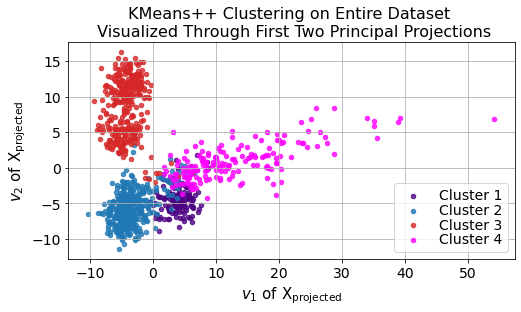

In [25]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(Xcluster[y_kmeansPP == 0, 0], Xcluster[y_kmeansPP == 0, 1], 
           s = 20, c = 'indigo', label = 'Cluster 1', alpha=0.8)
ax.scatter(Xcluster[y_kmeansPP == 1, 0], Xcluster[y_kmeansPP == 1, 1], 
           s = 20, c = 'tab:blue', label = 'Cluster 2', alpha=0.8)
ax.scatter(Xcluster[y_kmeansPP == 2, 0], Xcluster[y_kmeansPP == 2, 1], 
           s = 20, c = 'tab:red', label = 'Cluster 3', alpha=0.8)
ax.scatter(Xcluster[y_kmeansPP == 3, 0], Xcluster[y_kmeansPP == 3, 1], 
           s = 20, c = 'magenta', label = 'Cluster 4', alpha=0.8)
ax.set_title('KMeans++ Clustering on Entire Dataset \n Visualized Through First Two Principal Projections', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{2}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(prop={'size': 14}, ncol=1, labelspacing=0.05, loc='lower right')
plt.grid()
plt.show()

### Desired Clustering of First Two Principal Projections

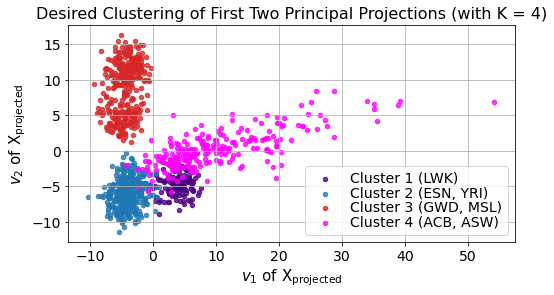

In [26]:
# Forming the uniquePopulations list
uniquePopulations = ['ACB', 'ASW', 'GWD', 'MSL', 'ESN', 'YRI', 'LWK']

# Getting the projections on principal components
V1 = Xprojected[:, 0].reshape(-1,1)  # First projection
V2 = Xprojected[:, 1].reshape(-1,1)  # Second projection

# Fetching the first two principal projections corresponding to each population
for i in range(len(uniquePopulations)):
    p = uniquePopulations[i]
    if (p == 'ACB'):
        idx = np.where(populations == p)
        V1_ACB = V1[idx]
        V2_ACB = V2[idx]
    if (p == 'ASW'):
        idx = np.where(populations == p)
        V1_ASW = V1[idx]
        V2_ASW = V2[idx]
    if (p == 'GWD'):
        idx = np.where(populations == p)
        V1_GWD = V1[idx]
        V2_GWD = V2[idx]
    if (p == 'MSL'):
        idx = np.where(populations == p)
        V1_MSL = V1[idx]
        V2_MSL = V2[idx]
    if (p == 'ESN'):
        idx = np.where(populations == p)
        V1_ESN = V1[idx]
        V2_ESN = V2[idx]
    if (p == 'YRI'):
        idx = np.where(populations == p)
        V1_YRI = V1[idx]
        V2_YRI = V2[idx]
    if (p == 'LWK'):
        idx = np.where(populations == p)
        V1_LWK = V1[idx]
        V2_LWK = V2[idx]

# Forming the vectors for x- and y-axes
V1c1 = V1_LWK
V2c1 = V2_LWK
V1c2 = np.concatenate((V1_ESN,V1_YRI), axis=0)
V2c2 = np.concatenate((V2_ESN,V2_YRI), axis=0)
V1c3 = np.concatenate((V1_GWD,V1_MSL), axis=0)
V2c3 = np.concatenate((V2_GWD,V2_MSL), axis=0)
V1c4 = np.concatenate((V1_ACB,V1_ASW), axis=0)
V2c4 = np.concatenate((V2_ACB,V2_ASW), axis=0)

# Scatter plot (if any) for Question(f)
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(V1c1, V2c1, s = 20, c = 'indigo', label = 'Cluster 1 (LWK)', alpha=0.8)
ax.scatter(V1c2, V2c2, s = 20, c = 'tab:blue', label = 'Cluster 2 (ESN, YRI)', alpha=0.8)
ax.scatter(V1c3, V2c3, s = 20, c = 'tab:red', label = 'Cluster 3 (GWD, MSL)', alpha=0.8)
ax.scatter(V1c4, V2c4, s = 20, c = 'magenta', label = 'Cluster 4 (ACB, ASW)', alpha=0.8)
ax.set_title('Desired Clustering of First Two Principal Projections (with K = 4)', 
             fontsize=16)
ax.set_xlabel('$v_{1}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.set_ylabel('$v_{2}$ of X$_{\mathrm{projected}}$', fontsize=15)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(prop={'size': 14}, ncol=1, labelspacing=0.05, loc='lower right')
plt.grid()
plt.show()

### Bar Plot of Samples Belonging to The Same Cluster

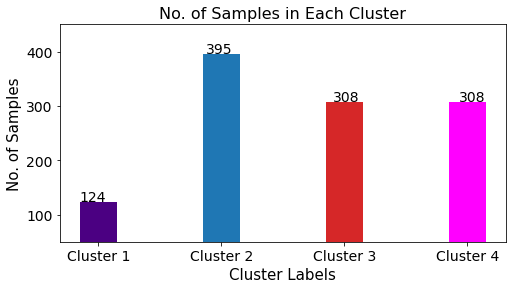

In [27]:
# User-defined function for counting the total no. of samples in each cluster
def cluster_count(y_, cluster_label_):
    '''
    Returns the total no. of samples in each cluster

    Args:
        y_ (vector, len = m): Vector containing the cluster labels 
        cluster_label_ (int): Integer corresponding to a cluster label
    '''
    y_ = y_.reshape(-1,1)
    count = 0
    for i in range(y_.shape[0]):
        if y_[i, :] == cluster_label_:
            count = count + 1
    return count

# Fetching the total no. of samples in each cluster
n_cluster_label_1 = cluster_count(y_=y_kmeansPP, cluster_label_=0)
n_cluster_label_2 = cluster_count(y_=y_kmeansPP, cluster_label_=1)
n_cluster_label_3 = cluster_count(y_=y_kmeansPP, cluster_label_=2)
n_cluster_label_4 = cluster_count(y_=y_kmeansPP, cluster_label_=3)

# Forming the vectors for plotting the bar plot
height = [n_cluster_label_1, n_cluster_label_2, 
          n_cluster_label_3, n_cluster_label_3]
bars = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4')
y_pos = np.arange(len(bars))

# HERE comes the bar plot
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(y_pos, 
       height, 
       color=['indigo', 'tab:blue', 'tab:red', 'magenta'],
       width = 0.3)
ax.set_title('No. of Samples in Each Cluster', 
             fontsize=16)
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.005),
              fontsize=14)
ax.set_xlabel('Cluster Labels', fontsize=15)
ax.set_ylabel('No. of Samples', fontsize=15)
ax.set_ylim(50, 450)
plt.xticks(y_pos, bars)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.show()
plt.show()

<a id='QuestionF'></a>
<div class=" alert alert-warning">
    <b>Question.</b>
 
Does it correlate well with the clustering results based on the first two principal components? Why or why not? 
    
</div>

<a id='AnswerQA'></a>
<div class=" alert alert-info">
    <b>Answer.</b>

$\textbf{Brief Discussion}$: Since K = $\texttt{4}$ is the optimal number of clusters, I would have wanted the clustering to take place in such a fashion so that:

1. the population from Kenya ($\texttt{LWK}$) can form one cluster
    
2. the populations from Nigeria ($\texttt{ESN}$ and $\texttt{YRI}$) can form the second cluster
    
3. the populations from the western African nations of The Gambia ($\texttt{GWD}$) and Sierra Leone ($\texttt{MSL}$) can form the third cluster
    
4. the populations from North America ($\texttt{ACB}$ and $\texttt{ASW}$) can form the fourth cluster
    
    
$\textbf{Correlation}$: This clustering result does $\underline{\text{NOT}}$ correlate much with the clustering results based on the first two principal projections. This is because, although PCA can capture most of the information in a given dataset, it cannot capture all the information. Furthermore, the first two principal projections could only provide data in $\texttt{2}$-D and not in higher dimensions. 

Hence, when KMeans++ clustering algorithm was applied previously on the first two principal projections, it did not cluster the data points according to the populations from different regions. However, when the same KMeans++ clustering algortihm was applied on the entire dataset $-$ which is of higher dimension $-$ KMeans++ clustering algorithm could precisely cluster the higher dimensional data points according to the populations from different regions.

    
</div>